In [2]:
import pandas as pd
X_train = pd.read_csv(r"/workspaces/boosting-algorithm/data/interim/X_train.csv")
X_test = pd.read_csv(r"/workspaces/boosting-algorithm/data/interim/X_test.csv")
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5,116.0,74.0,23,30.5,25.6,0.201,30
1,1,168.0,88.0,29,30.5,35.0,0.905,52
2,6,125.0,76.0,23,30.5,33.8,0.121,54
3,1,146.0,56.0,23,30.5,29.7,0.564,29
4,0,146.0,82.0,23,30.5,40.5,1.781,44
...,...,...,...,...,...,...,...,...
609,13,152.0,90.0,33,29.0,26.8,0.731,43
610,0,131.0,88.0,23,30.5,31.6,0.743,32
611,0,104.0,64.0,23,116.0,27.8,0.454,23
612,11,85.0,74.0,23,30.5,30.1,0.300,35


In [3]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,93.0,100.0,39,72.0,43.4,1.021,35
1,3,116.0,74.0,15,105.0,26.3,0.107,24
2,4,99.0,72.0,17,30.5,25.6,0.294,28
3,1,125.0,50.0,40,167.0,33.3,0.962,28
4,3,176.0,86.0,27,156.0,33.3,1.154,52
...,...,...,...,...,...,...,...,...
149,4,129.0,86.0,20,270.0,35.1,0.231,23
150,3,106.0,72.0,23,30.5,25.8,0.207,27
151,3,173.0,82.0,48,465.0,38.4,2.137,25
152,0,105.0,64.0,41,142.0,41.5,0.173,22


In [4]:
y_train = pd.read_csv(r"/workspaces/boosting-algorithm/data/interim/y_train.csv")
y_test = pd.read_csv(r"/workspaces/boosting-algorithm/data/interim/y_test.csv")  
y_test

,Outcome
0,0
1,0
2,0
3,1
4,1
...,...
149,0
150,0
151,1
152,0


In [5]:
y_train

,Outcome
0,0
1,1
2,1
3,0
4,0
...,...
609,1
610,1
611,0
612,0


In [6]:
from pickle import dump, load
from sklearn.feature_selection import f_classif, SelectKBest
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

accs = []
for p in [1, 0.8, 0.7, 0.6, 0.5]:
    selection_model = SelectKBest(f_classif, k = int(len(X_train.columns) * p))
    selection_model.fit(X_train, y_train)

    ix = selection_model.get_support()
    train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])

    

    model = XGBClassifier(random_state = 14)
    model.fit(train_sel, y_train)
    y_pred = model.predict(train_sel)
    acc = accuracy_score(y_train, y_pred)
    accs.append(acc)

best_acc = accs.index(max(accs))

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [7]:
number_of_columns=int(len(X_train.columns)*[1, 0.8, 0.7, 0.6, 0.5][best_acc])
number_of_columns

8

In [8]:
selection_model = SelectKBest(f_classif, k = number_of_columns)
selection_model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=8)

In [9]:
dump(selection_model, open(r"/workspaces/boosting-algorithm/models/selection_model.pk", "wb"))

In [10]:
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])
selection_model = XGBClassifier(random_state = 14)
selection_model.fit(X_train_sel, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=14, ...)

In [11]:
X_train_sel

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5.0,116.0,74.0,23.0,30.5,25.6,0.201,30.0
1,1.0,168.0,88.0,29.0,30.5,35.0,0.905,52.0
2,6.0,125.0,76.0,23.0,30.5,33.8,0.121,54.0
3,1.0,146.0,56.0,23.0,30.5,29.7,0.564,29.0
4,0.0,146.0,82.0,23.0,30.5,40.5,1.781,44.0
...,...,...,...,...,...,...,...,...
609,13.0,152.0,90.0,33.0,29.0,26.8,0.731,43.0
610,0.0,131.0,88.0,23.0,30.5,31.6,0.743,32.0
611,0.0,104.0,64.0,23.0,116.0,27.8,0.454,23.0
612,11.0,85.0,74.0,23.0,30.5,30.1,0.300,35.0


In [12]:
X_test_sel

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,93.0,100.0,39.0,72.0,43.4,1.021,35.0
1,3.0,116.0,74.0,15.0,105.0,26.3,0.107,24.0
2,4.0,99.0,72.0,17.0,30.5,25.6,0.294,28.0
3,1.0,125.0,50.0,40.0,167.0,33.3,0.962,28.0
4,3.0,176.0,86.0,27.0,156.0,33.3,1.154,52.0
...,...,...,...,...,...,...,...,...
149,4.0,129.0,86.0,20.0,270.0,35.1,0.231,23.0
150,3.0,106.0,72.0,23.0,30.5,25.8,0.207,27.0
151,3.0,173.0,82.0,48.0,465.0,38.4,2.137,25.0
152,0.0,105.0,64.0,41.0,142.0,41.5,0.173,22.0


In [13]:
X_train_sel.to_csv(r"/workspaces/boosting-algorithm/data/processed/train_X_sel.csv", index=False)
X_test_sel.to_csv(r"/workspaces/boosting-algorithm/data/processed/test_X_sel.csv", index=False)

In [14]:
y_pred = selection_model.predict(X_train_sel)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred)

1.0

In [16]:
y_pred = selection_model.predict(X_test_sel)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [17]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [18]:

from sklearn.model_selection import ParameterGrid
 
best_accuracy = 0
best_combination = None

hyperparams = {
   "n_estimators":[38],
    "gamma": [0, 0.5, 1, 5, 10, 50, 100, 1000],
    "colsample_by_level": [1,2,3,4,5,6],
    'min_child_weight':[1,5,10,50],
    'max_depth':[5, 10],
    'learning_rate':[0.1, 0.5, 1],
    'objective':['reg:logistic'],
    #'subsample':[0.01, 0.25, 0.5, 0.75, 1],
    'random_state': [14]
}

accs = []
for combination in ParameterGrid(hyperparams):
    model = XGBClassifier(**combination)
    model.fit(X_train_sel, y_train)   
    y_pred = model.predict(X_train_sel)
    acc = accuracy_score(y_train, y_pred)
    print("Combination:", combination)
    print("Accuracy:", acc)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_combination = combination
        
print("Best Combination:", best_combination)
print("Best Accuracy:", best_accuracy)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)


Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9153094462540716
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8729641693811075
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8322475570032574
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557


/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.99185667752443
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9006514657980456
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8322475570032574
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 1.0
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9771986970684039
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9022801302931596
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.757328990228013
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_sta

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9869706840390879
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9169381107491856
Combination: {'colsample_by_level': 1, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7361563517915309
Combination: {'colsample_by_level': 1, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9267100977198697
Combination: {'colsample_by_level': 1, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:37] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8990228013029316
Combination: {'colsample_by_level': 1, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8387622149837134
Combination: {'colsample_by_level': 1, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 1, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9755700325732899
Combination: {'colsample_by_level': 1, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': '

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.741042345276873
Combination: {'colsample_by_level': 1, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.998371335504886
Combination: {'colsample_by_level': 1, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9755700325732899
Combination: {'colsample_by_level': 1, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9006514657980456
Combination: {'colsample_by_level': 1, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logis

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9609120521172638
Combination: {'colsample_by_level': 1, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9022801302931596
Combination: {'colsample_by_level': 1, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8403908794788274
Combination: {'colsample_by_level': 1, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 1, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logis

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8583061889250815
Combination: {'colsample_by_level': 1, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 1, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9348534201954397
Combination: {'colsample_by_level': 1, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9153094462540716
Combination: {'colsample_by_level': 1, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', '

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8208469055374593
Combination: {'colsample_by_level': 1, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8110749185667753
Combination: {'colsample_by_level': 1, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 1, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8387622149837134
Combination: {'colsample_by_level': 1, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:38] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.747557003257329
Combination: {'colsample_by_level': 1, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8273615635179153
Combination: {'colsample_by_level': 1, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8110749185667753
Combination: {'colsample_by_level': 1, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 1, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logi

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.742671009771987
Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7899022801302932
Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7833876221498371
Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7899022801302932
Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logis

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7801302931596091
Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7947882736156352
Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7915309446254072
Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.749185667752443
Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7964169381107492
Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7964169381107492
Combination: {'colsample_by_level': 1, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic',

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:39] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 1, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 1, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 1, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:lo

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 50, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 1, 'gamma': 50, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 1, 'gamma': 50, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 1, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899


/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)


Combination: {'colsample_by_level': 1, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 1, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 1, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 1, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logist

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective'

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 100, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 1, 'gamma': 100, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 1, 'gamma': 100, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 1, 'gamma': 100, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:40] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026


/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)


Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'object

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objectiv

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspac

Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 1, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9153094462540716
Combination: {'colsample_by_level': 2, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:lo

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:42] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8322475570032574
Combination: {'colsample_by_level': 2, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 2, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.99185667752443
Combination: {'colsample_by_level': 2, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9006514657980456
Combination: {'colsample_by_level': 2, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:42] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.988599348534202
Combination: {'colsample_by_level': 2, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9234527687296417
Combination: {'colsample_by_level': 2, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7361563517915309
Combination: {'colsample_by_level': 2, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 1.0
Combination: {'colsample_by_level': 2, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
A

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:42] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8273615635179153
Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9869706840390879
Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8990228013029316
Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9429967426710097
Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8811074918566775
Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.749185667752443
Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9869706840390879
Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'r

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.741042345276873
Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.998371335504886
Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9755700325732899
Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9006514657980456
Combination: {'colsample_by_level': 2, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logis

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8583061889250815
Combination: {'colsample_by_level': 2, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 2, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9348534201954397
Combination: {'colsample_by_level': 2, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9153094462540716
Combination: {'colsample_by_level': 2, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', '

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:43] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8208469055374593
Combination: {'colsample_by_level': 2, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8110749185667753
Combination: {'colsample_by_level': 2, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 2, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8387622149837134
Combination: {'colsample_by_level': 2, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8273615635179153
Combination: {'colsample_by_level': 2, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8110749185667753
Combination: {'colsample_by_level': 2, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 2, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.747557003257329
Combination: {'colsample_by_level': 2, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 2, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.742671009771987
Combination: {'colsample_by_level': 2, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7899022801302932
Combination: {'colsample_by_level': 2, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7833876221498371
Combination: {'colsample_by_level': 2, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7915309446254072
Combination: {'colsample_by_level': 2, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7801302931596091
Combination: {'colsample_by_level': 2, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 2, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7947882736156352
Combination: {'colsample_by_level': 2, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:l

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7964169381107492
Combination: {'colsample_by_level': 2, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 2, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.749185667752443
Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)


Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899


/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:lo

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 2, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 2, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:lo

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:45] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 2, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 2, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 2, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'r

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspac

Combination: {'colsample_by_level': 2, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 2, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.99185667752443
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9006514657980456
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8322475570032574
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logist

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.998371335504886
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9641693811074918
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9071661237785016
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.757328990228013
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic'

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)


Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9771986970684039
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9022801302931596
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.757328990228013
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 1.0
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state'

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9869706840390879
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9169381107491856
Combination: {'colsample_by_level': 3, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7361563517915309
Combination: {'colsample_by_level': 3, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9267100977198697
Combination: {'colsample_by_level': 3, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8990228013029316
Combination: {'colsample_by_level': 3, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8387622149837134
Combination: {'colsample_by_level': 3, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 3, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9755700325732899
Combination: {'colsample_by_level': 3, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': '

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.749185667752443
Combination: {'colsample_by_level': 3, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9837133550488599
Combination: {'colsample_by_level': 3, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9674267100977199
Combination: {'colsample_by_level': 3, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8892508143322475
Combination: {'colsample_by_level': 3, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logis

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8745928338762216
Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8355048859934854
Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9609120521172638


/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)


Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9022801302931596
Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8403908794788274
Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9381107491856677
Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logist

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8583061889250815
Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9348534201954397
Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9153094462540716
Combination: {'colsample_by_level': 3, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', '

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8208469055374593
Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8110749185667753
Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8387622149837134
Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8273615635179153
Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8110749185667753
Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.747557003257329
Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:48] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.742671009771987
Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8257328990228013
Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8403908794788274
Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 3, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'ra

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7899022801302932
Combination: {'colsample_by_level': 3, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7833876221498371
Combination: {'colsample_by_level': 3, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7899022801302932
Combination: {'colsample_by_level': 3, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.741042345276873
Combination: {'colsample_by_level': 3, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:log

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7801302931596091
Combination: {'colsample_by_level': 3, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 3, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7947882736156352
Combination: {'colsample_by_level': 3, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7915309446254072
Combination: {'colsample_by_level': 3, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 3, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.749185667752443
Combination: {'colsample_by_level': 3, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 3, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 3, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 3, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 3, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 3, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:l

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 3, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 3, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 3, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 3, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'r

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 100, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 3, 'gamma': 100, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'r

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:50] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objec

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspac

Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 3, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:lo

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8322475570032574
Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.99185667752443
Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9006514657980456
Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.998371335504886
Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9641693811074918
Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9071661237785016
Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9869706840390879
Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9169381107491856
Combination: {'colsample_by_level': 4, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7361563517915309
Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9267100977198697
Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9869706840390879


/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)


Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8990228013029316
Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8387622149837134
Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9755700325732899
Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': '

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8762214983713354
Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.749185667752443
Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9837133550488599
Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9674267100977199
Combination: {'colsample_by_level': 4, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:lo

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9120521172638436
Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8745928338762216
Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8355048859934854
Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:52] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9381107491856677
Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8973941368078175
Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8550488599348535
Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.741042345276873
Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9609120521172638
Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9267100977198697
Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8648208469055375
Combination: {'colsample_by_level': 4, 'gamma': 1, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'ra

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8387622149837134
Combination: {'colsample_by_level': 4, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8208469055374593
Combination: {'colsample_by_level': 4, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8110749185667753
Combination: {'colsample_by_level': 4, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 4, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logis

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8257328990228013
Combination: {'colsample_by_level': 4, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8403908794788274
Combination: {'colsample_by_level': 4, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 4, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.742671009771987
Combination: {'colsample_by_level': 4, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 4, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.742671009771987
Combination: {'colsample_by_level': 4, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7899022801302932
Combination: {'colsample_by_level': 4, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7833876221498371
Combination: {'colsample_by_level': 4, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:53] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7801302931596091
Combination: {'colsample_by_level': 4, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 4, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7947882736156352
Combination: {'colsample_by_level': 4, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7915309446254072
Combination: {'colsample_by_level': 4, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 4, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.749185667752443
Combination: {'colsample_by_level': 4, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 4, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 4, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 4, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 4, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 4, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 4, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logi

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 4, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 4, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 4, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 4, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic'

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 4, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 4, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 4, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 4, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'r

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:54] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 4, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 4, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 4, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 4, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspac

Combination: {'colsample_by_level': 4, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 4, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 4, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 4, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 4, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective':

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9153094462540716
Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8729641693811075
Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8322475570032574
Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8322475570032574
Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.998371335504886
Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9641693811074918
Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9022801302931596
Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.757328990228013
Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 1.0
Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.988599348534202
Combination: {'colsample_by_level': 5, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 1

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8990228013029316
Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8387622149837134
Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9755700325732899
Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': '

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8811074918566775
Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.749185667752443
Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9869706840390879
Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9478827361563518
Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:56] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.998371335504886
Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9755700325732899
Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9006514657980456
Combination: {'colsample_by_level': 5, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.741042345276873
Combination: {'colsample_by_level': 5, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logist

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8892508143322475
Combination: {'colsample_by_level': 5, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8583061889250815
Combination: {'colsample_by_level': 5, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 5, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9348534201954397
Combination: {'colsample_by_level': 5, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic',

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 1, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9609120521172638
Combination: {'colsample_by_level': 5, 'gamma': 1, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9267100977198697
Combination: {'colsample_by_level': 5, 'gamma': 1, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8648208469055375
Combination: {'colsample_by_level': 5, 'gamma': 1, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.741042345276873
Combination: {'colsample_by_level': 5, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'r

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8110749185667753
Combination: {'colsample_by_level': 5, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 5, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8273615635179153
Combination: {'colsample_by_level': 5, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8110749185667753
Combination: {'colsample_by_level': 5, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logist

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 5, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.742671009771987
Combination: {'colsample_by_level': 5, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8257328990228013
Combination: {'colsample_by_level': 5, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8403908794788274
Combination: {'colsample_by_level': 5, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'ran

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7833876221498371
Combination: {'colsample_by_level': 5, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7899022801302932
Combination: {'colsample_by_level': 5, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.741042345276873
Combination: {'colsample_by_level': 5, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7947882736156352
Combination: {'colsample_by_level': 5, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:l

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 5, 'gamma': 10, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7964169381107492
Combination: {'colsample_by_level': 5, 'gamma': 10, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7964169381107492
Combination: {'colsample_by_level': 5, 'gamma': 10, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 5, 'gamma': 10, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic'

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 5, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 5, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 5, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:lo

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 5, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 5, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 50, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 5, 'gamma': 50, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'r

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 5, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 5, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 100, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 5, 'gamma': 100, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:lo

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:59] WARNING: /workspac

Combination: {'colsample_by_level': 5, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 5, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objectiv

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8729641693811075
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8322475570032574
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.99185667752443
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic'

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9641693811074918
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9071661237785016
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.757328990228013
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 1.0
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_sta

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.757328990228013
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 1.0
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.988599348534202
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9234527687296417
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}


/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:00] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9169381107491856
Combination: {'colsample_by_level': 6, 'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7361563517915309
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9267100977198697
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8680781758957655
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:log

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8990228013029316
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8387622149837134
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': '

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9478827361563518
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8762214983713354
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.749185667752443
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9837133550488599
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9006514657980456
Combination: {'colsample_by_level': 6, 'gamma': 0.5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.741042345276873
Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9120521172638436
Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logist

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9609120521172638
Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9022801302931596
Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8403908794788274
Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logis

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:01] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9625407166123778
Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8892508143322475
Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8583061889250815
Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)


Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.9267100977198697
Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8648208469055375
Combination: {'colsample_by_level': 6, 'gamma': 1, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.741042345276873
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8257328990228013
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', '

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8387622149837134
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8208469055374593
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8110749185667753
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.750814332247557
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logis

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:02] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.747557003257329
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8273615635179153
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8110749185667753
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logis

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)


Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8257328990228013
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.8403908794788274
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.742671009771987
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 6, 'gamma': 5, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.742671009771987
Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7899022801302932
Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7833876221498371
Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.741042345276873
Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7947882736156352
Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7915309446254072
Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7801302931596091
Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:lo

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.749185667752443
Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7964169381107492
Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7964169381107492
Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7996742671009772
Combination: {'colsample_by_level': 6, 'gamma': 10, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic'

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logi

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logis

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 50, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 100, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 6, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 100, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:04] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 100, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 100, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.7345276872964169
Combination: {'colsample_by_level': 6, 'gamma': 100, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 100, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.755700325732899
Combination: {'colsample_by_level': 6, 'gamma': 100, 'learning_rate': 1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logisti

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:05] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 6, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 6, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 6, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 6, 'gamma': 1000, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objectiv

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:05] WARNING: /workspac

Combination: {'colsample_by_level': 6, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 6, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 6, 'gamma': 1000, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 50, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 6, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 38, 'objective': 'reg:logistic', 'random_state': 14}
Accuracy: 0.6514657980456026
Combination: {'colsample_by_level': 6, 'gamma': 1000, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 38, 'objective':

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)


In [18]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "n_estimators":[38],
    "gamma": [0, 0.5, 1, 5, 10, 50, 100, 1000],
    "colsample_by_level": [1,2,3,4,5,6],
    'min_child_weight':[1,5,10,50],
    'max_depth':[5, 10],
    'learning_rate':[0.1, 0.5, 1],
    'objective':['reg:logistic'],
    #'subsample':[0.01, 0.25, 0.5, 0.75, 1],
    'random_state': [14]
}

grid = GridSearchCV(selection_model, hyperparams, cv = 5)
grid

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=14, ...),
             param_grid={'colsample_by_level': [1, 2, 3, 4, 5, 6],
                         'gamma': [0, 0.5, 1, 5, 10, 50, 100, 1000],
                         'learning_rate': [0.1, 0.5, 1], 'max_depth': [5, 10],
                         'min_child_weight': [1, 5, 10, 50],
                         'n_estimators': [38], 'objective': ['reg:logistic'],
                         'random_state': [14]})

In [19]:
grid.fit(X_train_sel, y_train)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:10:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:10:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:10:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:10:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:10:33] WARNING: /workspac

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:10:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:10:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:10:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:10:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:10:33] WARNING: /workspac

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=14, ...),
             param_grid={'colsample_by_level': [1, 2, 3, 4, 5, 6],
                         'gamma': [0, 0.5, 1, 5, 10, 50, 100, 1000],
                         'learning_rate': [0.1, 0.5, 1], 'max_depth': [5, 10],
                         'min_child_weight': [1, 5, 10, 50],
                         'n_estimators': [38], 'objective': ['reg:logistic'],
                         'random_state': [14]})

In [19]:
best_combination

{'colsample_by_level': 1,
 'gamma': 0,
 'learning_rate': 0.5,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 38,
 'objective': 'reg:logistic',
 'random_state': 14}

In [20]:
best_model = XGBClassifier(**best_combination)
best_model.fit(X_train_sel, y_train)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_level" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_by_level=1, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=38,
              n_jobs=None, num_parallel_tree=None, ...)

In [21]:
y_pred = best_model.predict(X_train_sel)

In [22]:
accuracy_score(y_train, y_pred)

1.0

In [23]:
y_pred_test = best_model.predict(X_test_sel)

In [24]:
accuracy_score(y_test, y_pred_test)

0.7987012987012987

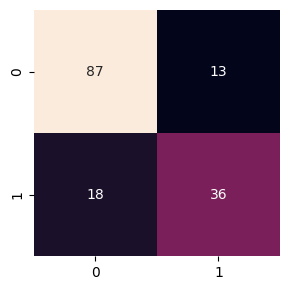

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bank_cm = confusion_matrix(y_test, y_pred_test)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
dump(best_model, open(r"/workspaces/boosting-algorithm/models/boosting_model.pk", "wb"))